<a href="https://colab.research.google.com/github/sky309/Global-Terrorism-Analysis/blob/main/Sarvesh_Kumar_Yadav_Global_Terrorism_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.</b>

# <b> Explore and analyze the data to discover key findings pertaining to terrorist activities. </b>

In [121]:
import numpy as np
import pandas as pd
import ast
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

In [122]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [123]:
file='/content/drive/MyDrive/AlmaBetter/Modules/week3/09-06-2021-/Assignment/Copy of Global Terrorism Data.csv'

In [ ]:
df= pd.read_csv(file, encoding= "ISO-8859-1")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


#Analysis based on Indian Terrorist Group:
#1) Top terrorist prone cities  in India v/s number of attacks
#2) State  vs. Terrorist group
  # 3) Number of damages vs Type of Attacks
# 4) Number of Attacks happen in each year '''


In [ ]:
df.shape

(181691, 135)

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [ ]:
df.head()


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANO-D,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23rd of September Communist League,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN

In [ ]:
sub_df = df[['eventid','iyear','country_txt','region_txt','provstate','city','attacktype1_txt','targtype1_txt','nkill','weapdetail','nwound','gname']]

In [ ]:
sub_df.rename(columns={'eventid':'id','iyear':'year','country_txt':'country','provstate':'state','region_txt':'region','attacktype1_txt':'attack_type','targtype1_txt':'target_type','nkill':'total_kills','provstat':'total_wou*nds','gname':'terrorist_group'},inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
sub_df


,id,year,country,region,state,city,attack_type,target_type,total_kills,weapdetail,nwound,terrorist_group
0,197000000001,1970,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,Assassination,Private Citizens & Property,1.0,NaN,0.0,MANO-D
1,197000000002,1970,Mexico,North America,Federal,Mexico city,Hostage Taking (Kidnapping),Government (Diplomatic),0.0,NaN,0.0,23rd of September Communist League
2,197001000001,1970,Philippines,Southeast Asia,Tarlac,Unknown,Assassination,Journalists & Media,1.0,NaN,0.0,Unknown
3,197001000002,1970,Greece,Western Europe,Attica,Athens,Bombing/Explosion,Government (Diplomatic),NaN,Explosive,NaN,Unknown
4,197001000003,1970,Japan,East Asia,Fukouka,Fukouka,Facility/Infrastructure Attack,Government (Diplomatic),NaN,Incendiary,NaN,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...
181686,201712310022,2017,Somalia,Sub-Saharan Africa,Middle Shebelle,Ceelka Geelow,Armed Assault,Military,1.0,NaN,2.0,Al-Shabaab
181687,201712310029,2017,Syria,Middle East & North Africa,Lattakia,Jableh,Bombing/Explosion,Military,2.0,Mortars were used in the attack.,7.0,Muslim extremists
181688,201712310030,2017,Philippines,Southeast Asia,Maguindanao,Kubentog,Facility/Infrastructure Attack,Private Citizens & Property,0.0,NaN,0.0,Bangsamoro Islamic Freedom Movement (BIFM)
181689,201712310031,2017,India,South Asia,Manipur,Imphal,Bombing/Explosion,Government (General),0.0,A thrown grenade was used in the attack.,0.0,Unknown


#Top terrorist prone cities in India v/s number of attacks


In [ ]:
sub_df

,id,year,country,region,state,city,attack_type,target_type,total_kills,weapdetail,nwound,terrorist_group
0,197000000001,1970,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,Assassination,Private Citizens & Property,1.0,NaN,0.0,MANO-D
1,197000000002,1970,Mexico,North America,Federal,Mexico city,Hostage Taking (Kidnapping),Government (Diplomatic),0.0,NaN,0.0,23rd of September Communist League
2,197001000001,1970,Philippines,Southeast Asia,Tarlac,Unknown,Assassination,Journalists & Media,1.0,NaN,0.0,Unknown
3,197001000002,1970,Greece,Western Europe,Attica,Athens,Bombing/Explosion,Government (Diplomatic),NaN,Explosive,NaN,Unknown
4,197001000003,1970,Japan,East Asia,Fukouka,Fukouka,Facility/Infrastructure Attack,Government (Diplomatic),NaN,Incendiary,NaN,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...
181686,201712310022,2017,Somalia,Sub-Saharan Africa,Middle Shebelle,Ceelka Geelow,Armed Assault,Military,1.0,NaN,2.0,Al-Shabaab
181687,201712310029,2017,Syria,Middle East & North Africa,Lattakia,Jableh,Bombing/Explosion,Military,2.0,Mortars were used in the attack.,7.0,Muslim extremists
181688,201712310030,2017,Philippines,Southeast Asia,Maguindanao,Kubentog,Facility/Infrastructure Attack,Private Citizens & Property,0.0,NaN,0.0,Bangsamoro Islamic Freedom Movement (BIFM)
181689,201712310031,2017,India,South Asia,Manipur,Imphal,Bombing/Explosion,Government (General),0.0,A thrown grenade was used in the attack.,0.0,Unknown


In [ ]:
df_India= sub_df[sub_df['country']=='India']
df_India

,id,year,country,region,state,city,attack_type,target_type,total_kills,weapdetail,nwound,terrorist_group
1186,197202220004,1972,India,South Asia,Delhi,New Delhi,Hijacking,Airports & Aircraft,0.0,Explosives,0.0,Palestinians
2764,197501190004,1975,India,South Asia,Bihar,Samastipur,Bombing/Explosion,Government (General),4.0,No additional information available.,0.0,Ananda Marga
3857,197605260001,1976,India,South Asia,Delhi,New Delhi,Bombing/Explosion,Airports & Aircraft,0.0,Explosive,0.0,Unknown
5327,197709280004,1977,India,South Asia,Maharashtra,Bombay,Hijacking,Airports & Aircraft,0.0,Firearm; Grenades,0.0,Japanese Red Army (JRA)
7337,197901130004,1979,India,South Asia,Assam,Unknown,Armed Assault,Police,NaN,Automatic firearm,NaN,Naga People
...,...,...,...,...,...,...,...,...,...,...,...,...
181663,201712300021,2017,India,South Asia,Kerala,Koothuparamba,Bombing/Explosion,Police,0.0,A crude bomb was used in the attack.,0.0,Unknown
181665,201712300023,2017,India,South Asia,Chhattisgarh,Toylanka,Facility/Infrastructure Attack,Business,0.0,NaN,0.0,Communist Party of India - Maoist (CPI-Maoist)
181672,201712310005,2017,India,South Asia,Jammu and Kashmir,Lethapora,Armed Assault,Police,8.0,Grenades and AK-47 assault rifles loaded with ...,3.0,Jaish-e-Mohammad (JeM)
181684,201712310019,2017,India,South Asia,Assam,Hungrum,Hostage Taking (Kidnapping),Government (General),0.0,A 9-mm carbine rifle was used in the attack.,0.0,Zeliangrong United Front


In [ ]:
# country_IND=sub_df[sub_df['country']=='India']
city_known = df_India[df_India['city']!='Unknown']
state_city=city_known[['state','city']]
city_mode=state_city.groupby('state')['city'].apply(lambda x: x.mode().loc[0])
city_mode=city_mode.reset_index()

In [ ]:
dict_=dict(zip(city_mode.state,city_mode.city))
df_India['new_city']=df_India.city.copy()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
for i,row in df_India.iterrows():
  if df_India.at[i,'state']!='Unknown':
    if df_India.at[i,'city']=='Unknown':
      df_India.at[i,'new_city']=dict_[row['state']]
    else:
      df_India.at[i,'new_city']=df_India.at[i,'new_city']

In [ ]:
df_India['city']= df_India['new_city']
df_India

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,id,year,country,region,state,city,attack_type,target_type,total_kills,weapdetail,nwound,terrorist_group,new_city
1186,197202220004,1972,India,South Asia,Delhi,New Delhi,Hijacking,Airports & Aircraft,0.0,Explosives,0.0,Palestinians,New Delhi
2764,197501190004,1975,India,South Asia,Bihar,Samastipur,Bombing/Explosion,Government (General),4.0,No additional information available.,0.0,Ananda Marga,Samastipur
3857,197605260001,1976,India,South Asia,Delhi,New Delhi,Bombing/Explosion,Airports & Aircraft,0.0,Explosive,0.0,Unknown,New Delhi
5327,197709280004,1977,India,South Asia,Maharashtra,Bombay,Hijacking,Airports & Aircraft,0.0,Firearm; Grenades,0.0,Japanese Red Army (JRA),Bombay
7337,197901130004,1979,India,South Asia,Assam,Guwahati,Armed Assault,Police,NaN,Automatic firearm,NaN,Naga People,Guwahati
...,...,...,...,...,...,...,...,...,...,...,...,...,...
181663,201712300021,2017,India,South Asia,Kerala,Koothuparamba,Bombing/Explosion,Police,0.0,A crude bomb was used in the attack.,0.0,Unknown,Koothuparamba
181665,201712300023,2017,India,South Asia,Chhattisgarh,Toylanka,Facility/Infrastructure Attack,Business,0.0,NaN,0.0,Communist Party of India - Maoist (CPI-Maoist),Toylanka
181672,201712310005,2017,India,South Asia,Jammu and Kashmir,Lethapora,Armed Assault,Police,8.0,Grenades and AK-47 assault rifles loaded with ...,3.0,Jaish-e-Mohammad (JeM),Lethapora
181684,201712310019,2017,India,South Asia,Assam,Hungrum,Hostage Taking (Kidnapping),Government (General),0.0,A 9-mm carbine rifle was used in the attack.,0.0,Zeliangrong United Front,Hungrum


In [ ]:
df_number_of_attacks_by_cities =df_India['city'].value_counts().rename_axis('unique_cities').reset_index(name='number_of_attacks')
df_sorted_city_by_attacks= df_number_of_attacks_by_cities.sort_values(['number_of_attacks'], ascending= False).reset_index(drop= True)

In [ ]:
df_sorted_city_by_attacks

,unique_cities,number_of_attacks
0,Srinagar,744
1,Imphal,477
2,Amritsar,293
3,Guwahati,174
4,New Delhi,157
...,...,...
4793,gurdaspur district,1
4794,Maredumili,1
4795,Ralingkan,1
4796,Budhauli,1


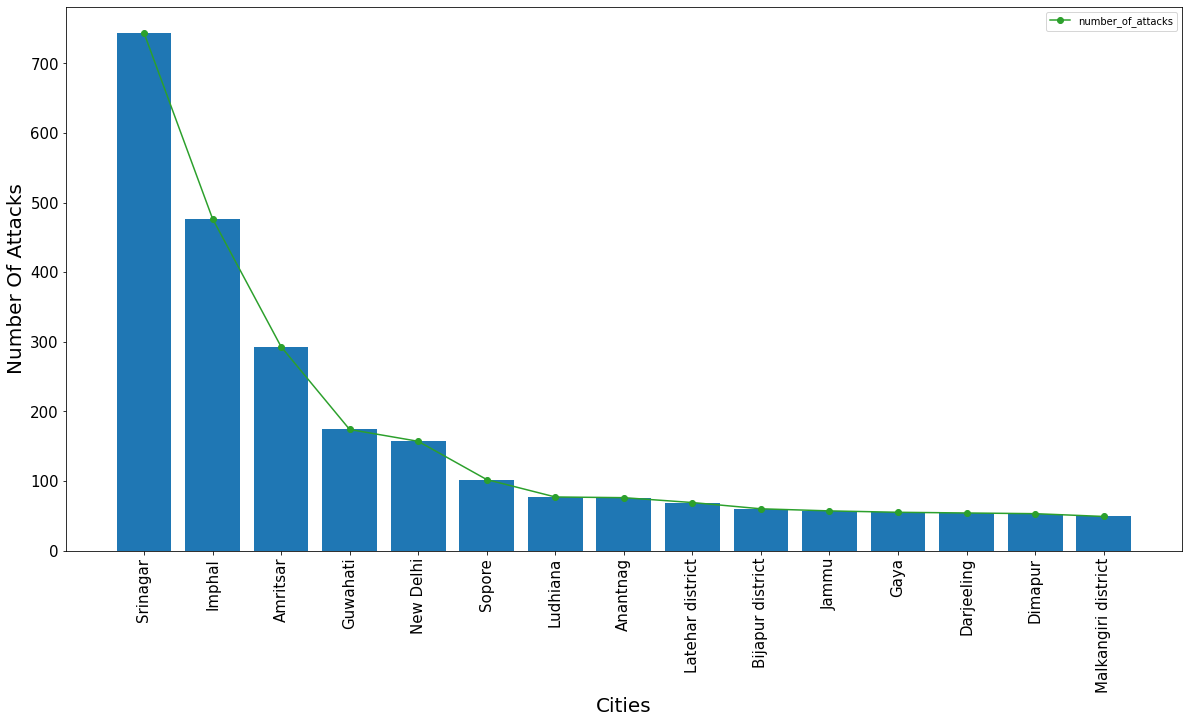

In [ ]:

plt.rcParams["figure.figsize"] = (20, 10)
df_sorted_city_by_attacks.head(15).plot(zorder=5,color='C2', marker='o')
plt.bar(df_sorted_city_by_attacks['unique_cities'].head(15),df_sorted_city_by_attacks['number_of_attacks'].head(15))
plt.yticks(fontsize=15)
plt.xticks(fontsize=15, rotation=90)
plt. xlabel('Cities', fontsize=20)
plt. ylabel('Number Of Attacks', fontsize=20)
plt.show()


#Statewise Terrorist group

In [ ]:
statewise_terrorist_attack_group=pd.DataFrame(df_India, columns=['state','terrorist_group','attack_type','total_kills' ])
active_group= statewise_terrorist_attack_group.groupby(['state','terrorist_group']).agg({'terrorist_group':'count'}).rename(columns={'terrorist_group':'number of attacks'}).reset_index()
most_active_group=active_group.groupby("state").max().reset_index()
most_active_terror_group_statewise= most_active_group.sort_values('number of attacks', ascending= False)
most_active_terror_group_statewise

,state,terrorist_group,number of attacks
12,Jammu and Kashmir,Unknown,1471
18,Manipur,Zomi Revolutionary Army (ZRA),680
6,Chhattisgarh,Vishwa Hindu Parishad (VHP),577
13,Jharkhand,Unknown,456
25,Punjab,Unknown,453
3,Assam,Zeliangrong United Front,338
4,Bihar,Unknown,324
34,West Bengal,Unknown,277
22,Odisha,Unknown,228
23,Orissa,Vishwa Hindu Parishad (VHP),172


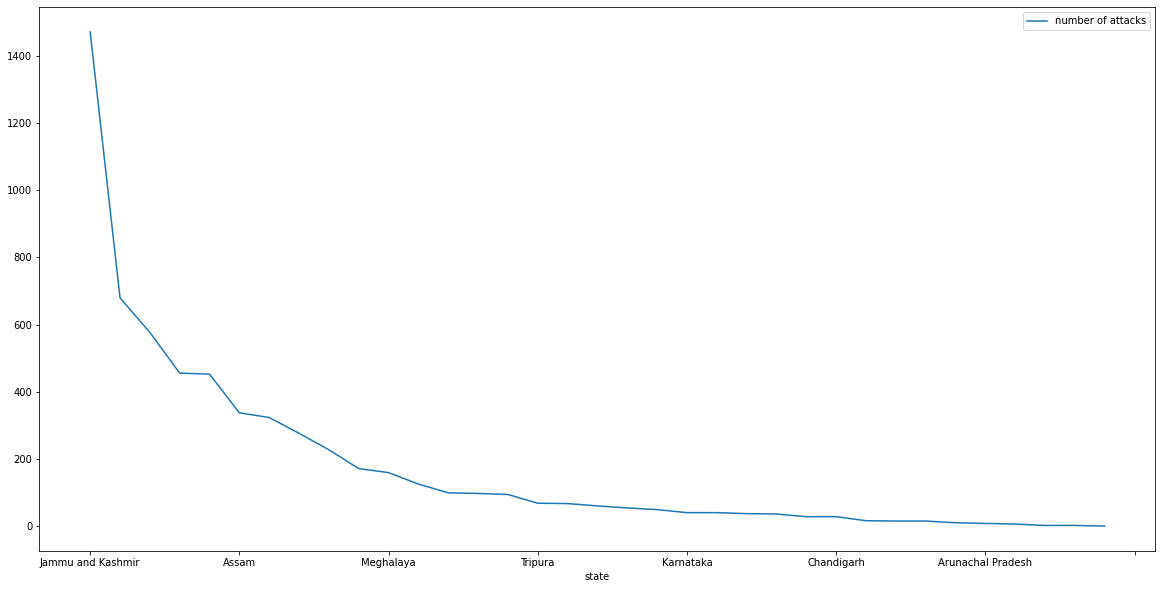

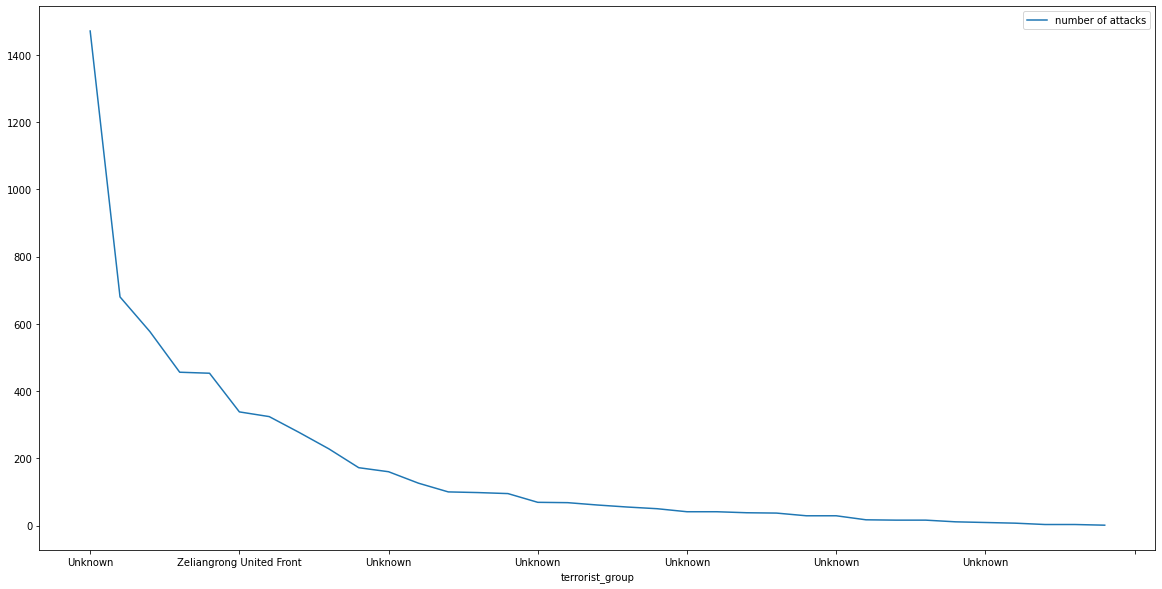

In [ ]:
most_active_terror_group_statewise.plot(x='state',y='number of attacks')
most_active_terror_group_statewise.plot(x='terrorist_group',y='number of attacks')

In [ ]:
df_Ind_new= df_India[df_India['terrorist_group']!='Unknown']
df_Ind_new

,id,year,country,region,state,city,attack_type,target_type,total_kills,weapdetail,nwound,terrorist_group,new_city
1186,197202220004,1972,India,South Asia,Delhi,New Delhi,Hijacking,Airports & Aircraft,0.0,Explosives,0.0,Palestinians,New Delhi
2764,197501190004,1975,India,South Asia,Bihar,Samastipur,Bombing/Explosion,Government (General),4.0,No additional information available.,0.0,Ananda Marga,Samastipur
5327,197709280004,1977,India,South Asia,Maharashtra,Bombay,Hijacking,Airports & Aircraft,0.0,Firearm; Grenades,0.0,Japanese Red Army (JRA),Bombay
7337,197901130004,1979,India,South Asia,Assam,Guwahati,Armed Assault,Police,NaN,Automatic firearm,NaN,Naga People,Guwahati
8174,197904260007,1979,India,South Asia,Manipur,Imphal,Armed Assault,Police,4.0,Unk,0.0,Meitei extremists,Imphal
...,...,...,...,...,...,...,...,...,...,...,...,...,...
181606,201712280023,2017,India,South Asia,Bihar,Sahajpur-Sahiyaar,Facility/Infrastructure Attack,Business,0.0,NaN,0.0,Maoists,Sahajpur-Sahiyaar
181612,201712280031,2017,India,South Asia,Manipur,Motbung,Hostage Taking (Kidnapping),Private Citizens & Property,0.0,A Chinese-made 9-mm pistol was used in the att...,0.0,Manipur Naga People's Army (MNPA),Motbung
181665,201712300023,2017,India,South Asia,Chhattisgarh,Toylanka,Facility/Infrastructure Attack,Business,0.0,NaN,0.0,Communist Party of India - Maoist (CPI-Maoist),Toylanka
181672,201712310005,2017,India,South Asia,Jammu and Kashmir,Lethapora,Armed Assault,Police,8.0,Grenades and AK-47 assault rifles loaded with ...,3.0,Jaish-e-Mohammad (JeM),Lethapora


In [ ]:
statewise_terrorist_attack_group=pd.DataFrame(df_Ind_new, columns=['state','terrorist_group','attack_type','total_kills' ])
active_group= statewise_terrorist_attack_group.groupby(['state','terrorist_group']).agg({'terrorist_group':'count'}).rename(columns={'terrorist_group':'number of attacks'}).reset_index()
most_active_group=active_group.groupby("state").max().reset_index()
most_active_terror_group_statewise= most_active_group.sort_values('number of attacks', ascending= False)
most_active_terror_group_statewise

,state,terrorist_group,number of attacks
6,Chhattisgarh,Vishwa Hindu Parishad (VHP),577
13,Jharkhand,Tritiya Prastuti Committee (TPC),456
25,Punjab,United Liberation Front of Assam (ULFA),453
3,Assam,Zeliangrong United Front,338
4,Bihar,Tritiya Prastuti Committee (TPC),324
34,West Bengal,United Liberation Front of Assam (ULFA),277
22,Odisha,People's War Group (PWG),228
12,Jammu and Kashmir,United Jihad Council,193
23,Orissa,Vishwa Hindu Parishad (VHP),172
19,Meghalaya,United Liberation Front of Assam (ULFA),160


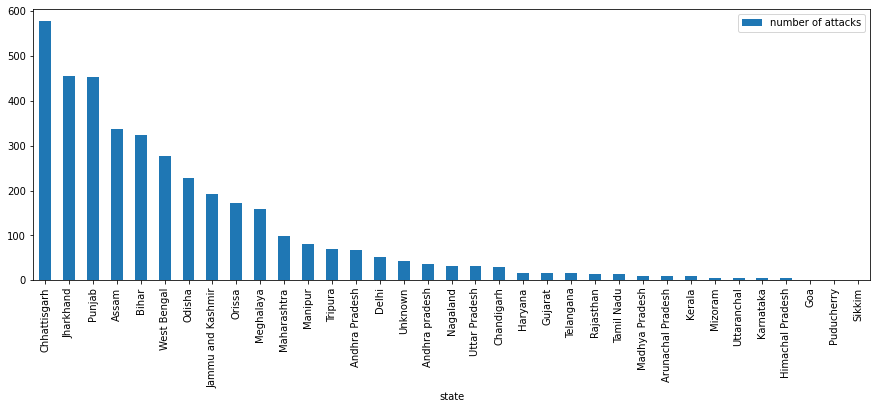

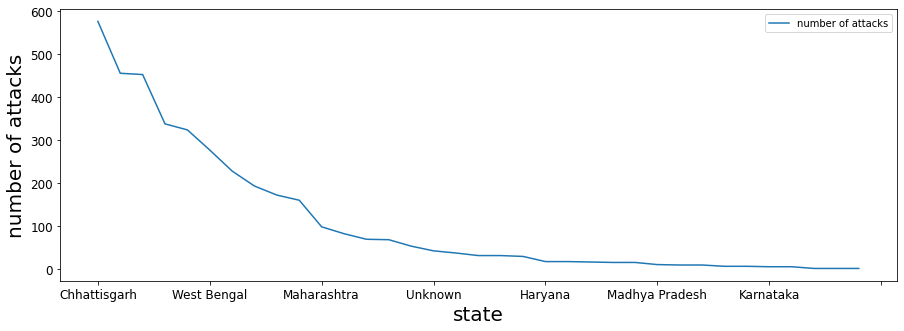

In [ ]:

plt.rcParams["figure.figsize"] = (15, 5)
most_active_terror_group_statewise.plot(kind='bar',x='state',y='number of attacks')
most_active_terror_group_statewise.plot(x='state',y='number of attacks')
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt. xlabel('state', fontsize=20)
plt. ylabel('number of attacks', fontsize=20)

c=most_active_terror_group_statewise['terrorist_group'].tolist


# Total Damage vs Type of Attack



In [ ]:
terrorist_attack_group=pd.DataFrame(df_India, columns=['city','terrorist_group','attack_type','total_kills' ])
terrorist_attack_group.sort_values('total_kills', ascending= False)

,city,terrorist_group,attack_type,total_kills
81098,Mumbai,Lashkar-e-Taiba (LeT),Bombing/Explosion,188.0
54416,Bombay,Muslim Militants,Armed Assault,115.0
96726,Jhargam,Communist Party of India - Maoist (CPI-Maoist),Unknown,115.0
95988,Dantewada district,Communist Party of India - Maoist (CPI-Maoist),Armed Assault,82.0
56912,Banabari,Bodo Militants,Armed Assault,70.0
...,...,...,...,...
99741,Jajpur,Communist Party of India - Maoist (CPI-Maoist),Bombing/Explosion,0.0
99739,Hotwag,Communist Party of India - Maoist (CPI-Maoist),Bombing/Explosion,0.0
99679,Marda,Communist Party of India - Maoist (CPI-Maoist),Facility/Infrastructure Attack,0.0
99676,Halewara,Communist Party of India - Maoist (CPI-Maoist),Facility/Infrastructure Attack,0.0


In [ ]:
index_names = terrorist_attack_group[ terrorist_attack_group['terrorist_group'] == 'Unknown' ].index
terrorist_attack_group.drop(index_names, inplace = True)

In [ ]:
terrorist_attack_group

,city,terrorist_group,attack_type,total_kills
1186,New Delhi,Palestinians,Hijacking,0.0
2764,Samastipur,Ananda Marga,Bombing/Explosion,4.0
5327,Bombay,Japanese Red Army (JRA),Hijacking,0.0
7337,Assam,Naga People,Armed Assault,2.0
8174,Manipur,Meitei extremists,Armed Assault,4.0
...,...,...,...,...
181606,Sahajpur-Sahiyaar,Maoists,Facility/Infrastructure Attack,0.0
181612,Motbung,Manipur Naga People's Army (MNPA),Hostage Taking (Kidnapping),0.0
181665,Toylanka,Communist Party of India - Maoist (CPI-Maoist),Facility/Infrastructure Attack,0.0
181672,Lethapora,Jaish-e-Mohammad (JeM),Armed Assault,8.0


In [ ]:
index_names = terrorist_attack_group[ terrorist_attack_group['attack_type'] == 'Unknown' ].index
terrorist_attack_group.drop(index_names, inplace = True)
terrorist_attack_group

,city,terrorist_group,attack_type,total_kills
1186,New Delhi,Palestinians,Hijacking,0.0
2764,Samastipur,Ananda Marga,Bombing/Explosion,4.0
5327,Bombay,Japanese Red Army (JRA),Hijacking,0.0
7337,Assam,Naga People,Armed Assault,2.0
8174,Manipur,Meitei extremists,Armed Assault,4.0
...,...,...,...,...
181606,Sahajpur-Sahiyaar,Maoists,Facility/Infrastructure Attack,0.0
181612,Motbung,Manipur Naga People's Army (MNPA),Hostage Taking (Kidnapping),0.0
181665,Toylanka,Communist Party of India - Maoist (CPI-Maoist),Facility/Infrastructure Attack,0.0
181672,Lethapora,Jaish-e-Mohammad (JeM),Armed Assault,8.0


In [ ]:
attack_type_killings= terrorist_attack_group.groupby(['attack_type'])['total_kills'].sum().rename_axis('attack_type').reset_index(name='total_kills')
attack_type_killings.sort_values('total_kills', ascending= False)

,attack_type,total_kills
0,Armed Assault,7340.0
2,Bombing/Explosion,4116.0
1,Assassination,1285.0
6,Hostage Taking (Kidnapping),942.0
3,Facility/Infrastructure Attack,136.0
5,Hostage Taking (Barricade Incident),130.0
4,Hijacking,39.0
7,Unarmed Assault,23.0


Text(0, 0.5, 'attack_type')

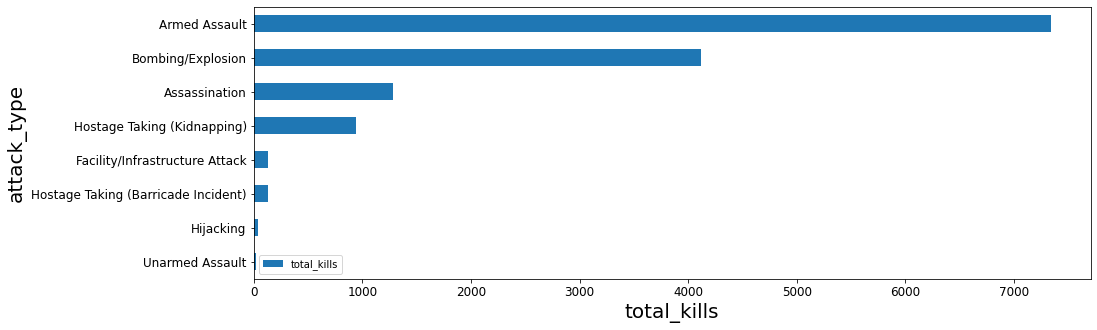

In [ ]:
plt.rcParams["figure.figsize"] = (15, 5)
attack_type_killings.sort_values('total_kills', ascending= True).plot(kind='barh',x='attack_type',y='total_kills')
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt. xlabel('total_kills', fontsize=20)
plt. ylabel('attack_type', fontsize=20)
plt.title


Text(0, 0.5, 'total_kills')

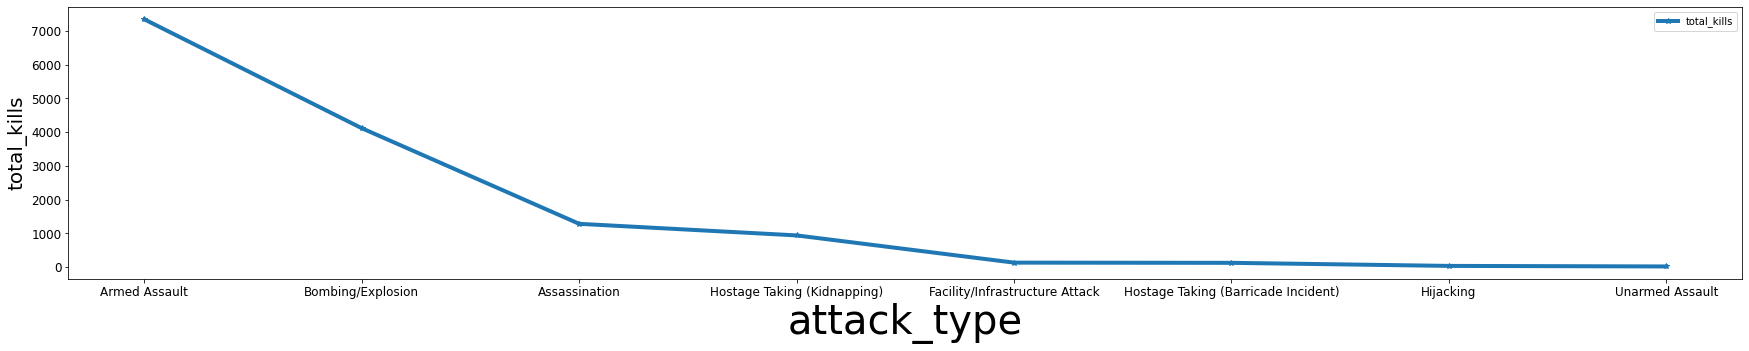

In [ ]:
plt.rcParams["figure.figsize"] = (30, 5)
attack_type_killings.sort_values('total_kills', ascending= False).plot(x='attack_type',y='total_kills')
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt. xlabel('attack_type', fontsize=40)
plt. ylabel('total_kills', fontsize=20)

#Number of Attacks happen in each year '''

In [ ]:
df_number_of_attacks_by_years =df_India['year'].value_counts().rename_axis('year').reset_index(name='number_of_attacks')
df_number_of_attacks_by_years

,year,number_of_attacks
0,2017,615
3,2016,574
2,2015,581
4,2014,564
7,2013,443
8,2012,379
5,2011,519
1,2010,589
6,2009,515
9,2008,318


Text(0.5, 1.0, 'number of attacks on year basis')

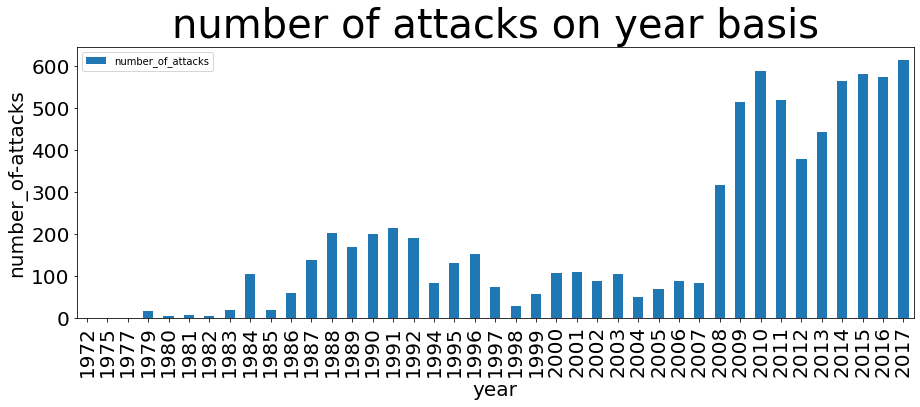

In [ ]:
df_number_of_attacks_by_years.sort_values('year',ascending= True).plot(kind='bar',x='year',y='number_of_attacks')
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.xlabel('year', fontsize=20)
plt.ylabel('number_of-attacks', fontsize=20)
plt.title('number of attacks on year basis', fontsize=40)



Text(0.5, 1.0, 'number of attacks on year basis')

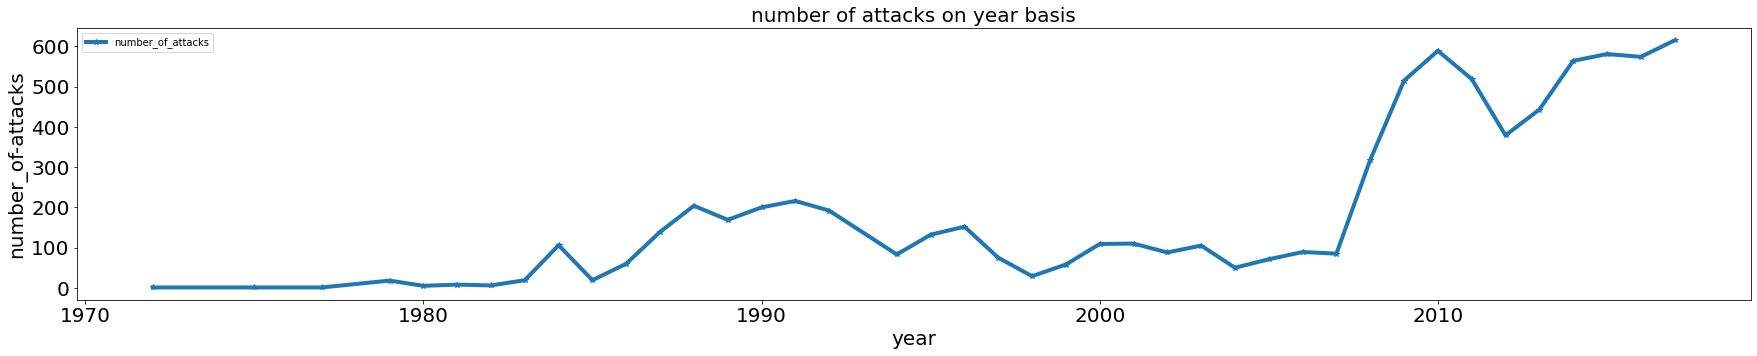

In [ ]:
plt.rcParams["figure.figsize"] = (30, 5)
df_number_of_attacks_by_years.sort_values('year',ascending= False).plot(x='year',y='number_of_attacks')
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.xlabel('year', fontsize=20)
plt.ylabel('number_of-attacks', fontsize=20)
plt.title('number of attacks on year basis', fontsize=20)